<a href="https://colab.research.google.com/github/arthurmagnusc/data_science/blob/main/An%C3%A1lise_dos_Dados_do_Airbnb_San_Francisco_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *San Francisco/CA*

A cidade de San Francisco localizada no estado da Califórnia é a 13ª cidade mais populosa dos Estados Unidos da América e é o local de nascimento de uma das maiores e mais valiosas startups do mundo.  

Hoje o [Airbnb](https://www.airbnb.com.br/) é considerada a **maior empresa hoteleira do mundo**, mesmo sem ser **proprietária de nenhum hotel**!

Quando Brian Chesky, Joe Gebbia e Nathan Blecharczyk iniciaram as atividades, tinham em mente resolver o problema de estadia dos participantes de um evento na cidade. Com o absoluto sucesso, moveram a empresa para o próximo nível, conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, sendo assim, o Airbnb fornece uma plataforma inovadora para tornar viavel essa nova modalidade de hospedagem.

No final de 2018, a Startup já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível ter acesso a alguns dados disponibilizados pela empresa.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Passaremos a analisar os dados referentes à cidade San Francisco/CA, e observar insights extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importação do arquivo (DataFrame)
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2021-08-04/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

A fim de facilitar a compreensão dos dados abaixo, seguem as variáveis utilizadas no projeto.

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Abaixo está exposta a amostra dos dados contendo os 5 primeiros itens presentes do *DataFrame*.

In [ ]:
# amostra das 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,160,2,291,2021-07-29,3.50,1,129
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2015-08-28,0.78,1,365
2,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,19,2020-03-06,0.17,9,365
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,8,2017-08-12,0.10,9,365
4,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,895,7,28,2019-06-28,0.19,2,365


### **1. Atributos (variáveis)**

O Dataset é similar a uma planilha, onde as "Entradas" correspondem as linhas e as "Variáveis" às colunas. É importante observar ainda os tipos de dados contidos em cada variável.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	6612
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2. Percentual de valores ausentes no dataset**

Embora muito rico em dados, o *DataFrame* apresenta valores ausentes, ou seja, campos "em branco". Abaixo identifica-se o percentual de "ausência" de dados em cada variável.

In [ ]:
# variáveis por seus valores ausentes ordenadas em ordem decrescente 
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.232305
last_review                       0.232305
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **3. Distribuição das variáveis** 

Os histogramas abaixo demonstram indícios da presença de *outliers* nos dados.

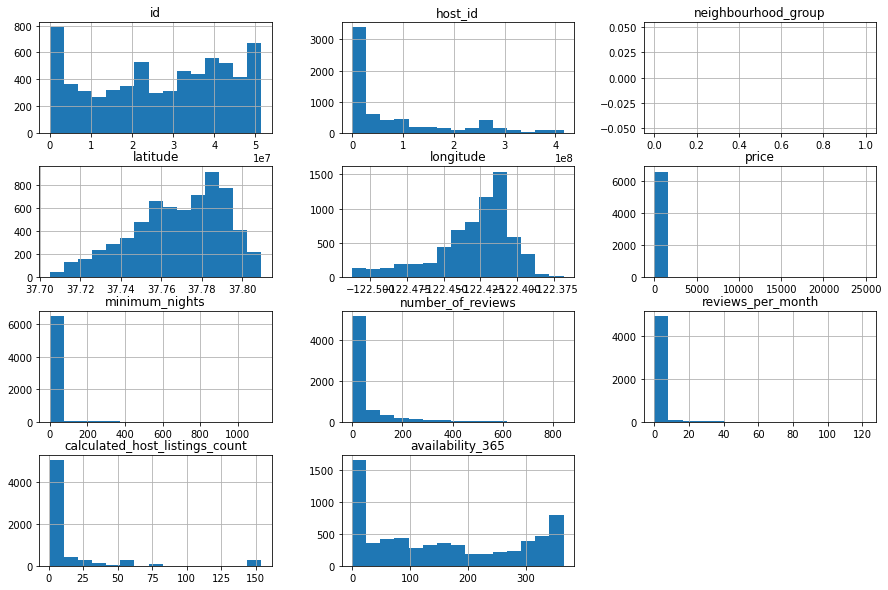

In [ ]:
# plot do histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **4. Outliers**

---




Conforme observado na distribuição do histograma, é muito provável que existam *outliers*. 

Ao analisar as variáveis `price` e `minimum_nights`, por exemplo, observa-se que os valores não seguem uma distribuição lógica e distorcem a representação gráfica.

In [ ]:
# resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6612.000000,6612.000000,6612.000000,5076.000000,6612.000000,6612.000000
mean,234.869480,19.563370,42.707048,1.702455,15.172111,155.325166
std,694.167073,32.816077,82.653792,3.802502,32.999929,131.554694
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000,1.000000,0.200000,1.000000,24.000000
50%,149.000000,30.000000,6.000000,0.680000,2.000000,133.000000
75%,245.000000,30.000000,43.000000,2.000000,10.000000,292.000000
max,25000.000000,1125.000000,841.000000,122.080000,154.000000,365.000000


Pode-se observar na amostra acima que a quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.




#### Boxplot para minimum_nights


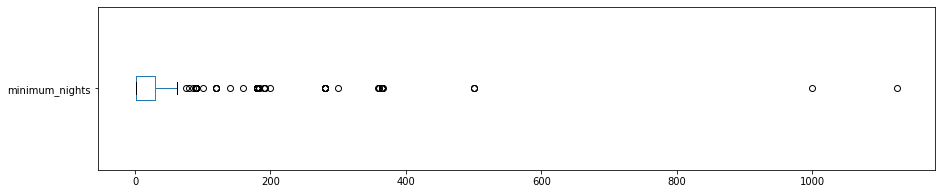

minimum_nights: Valores acima de 30
274 entradas
4.1440%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: Valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])* 100))

#### Boxplot para price

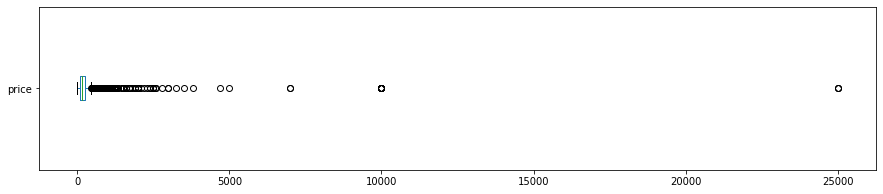


Price: Valores acima de $1500,00
50 entradas
0.7562%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nPrice: Valores acima de $1500,00")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Após identificar a presença de *outliers* nas variáveis `price` e `minimum_nights`, observe-se abaixo o *DataFrame* limpo.

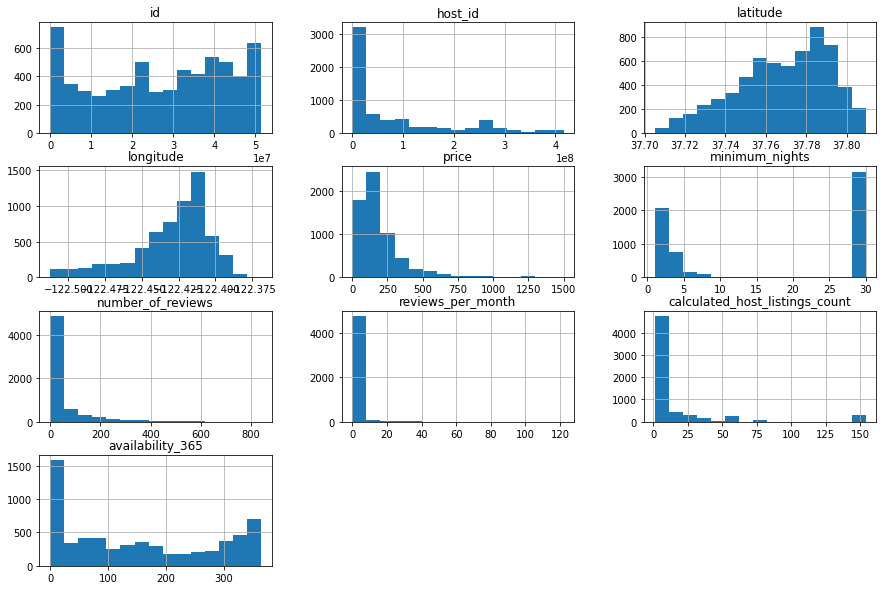

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **5. Correlação entre as variáveis**

Segue abaixo a matriz de correlação entre as variáveis, com o objetivo de estabelecer relação ou semelhança entre duas variáveis.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.244093,-0.083811,-0.039368,-0.072622,-0.083312
minimum_nights,-0.244093,1.000000,-0.335720,-0.260328,0.157608,0.293795
number_of_reviews,-0.083811,-0.335720,1.000000,0.355432,-0.169638,-0.024925
reviews_per_month,-0.039368,-0.260328,0.355432,1.000000,-0.113882,0.002652
calculated_host_listings_count,-0.072622,0.157608,-0.169638,-0.113882,1.000000,0.083311
availability_365,-0.083312,0.293795,-0.024925,0.002652,0.083311,1.000000


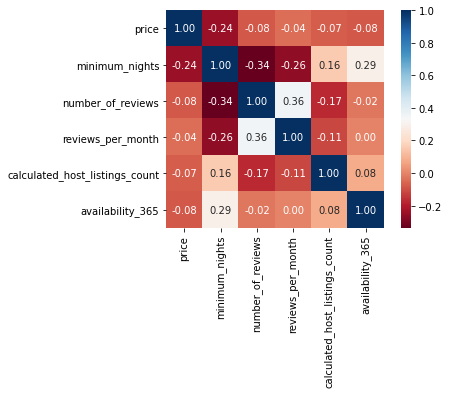

In [ ]:
# heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6. Tipo de imóvel mais alugado no Airbnb**

O Airbnb disponibiliza diferentes opções para locação. Na base ora analisada, existe a variável `room_type` que possui tais dados.

In [ ]:
# quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3918
Private room       2107
Shared room         172
Hotel room           95
Name: room_type, dtype: int64

In [ ]:
# porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.622695
Private room       0.334870
Shared room        0.027336
Hotel room         0.015099
Name: room_type, dtype: float64

### **7. Localidade mais cara do dataset**

Compara-se abaixo os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Russian Hill           289.204678
Presidio               287.555556
Marina                 265.519481
Twin Peaks             263.000000
Castro/Upper Market    251.640288
Pacific Heights        246.155039
Potrero Hill           238.206452
Glen Park              237.698113
Diamond Heights        233.833333
North Beach            228.540541
Name: price, dtype: float64

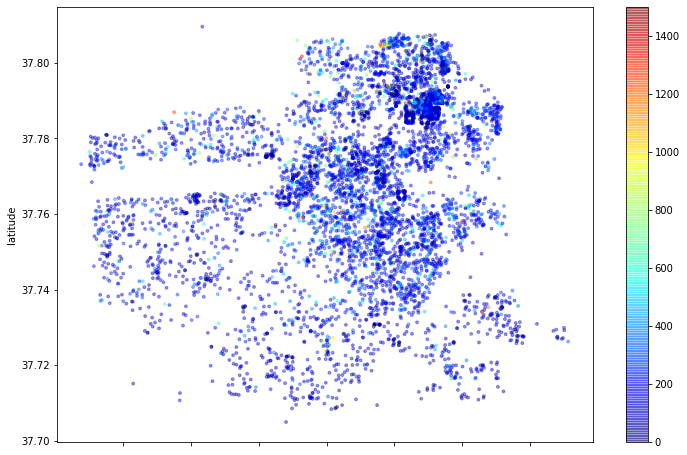

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude' ,alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Embora superficial, a análise na base de dados resumida do Airbnb permitiu observar a presença de *outliers* em algumas das variáveis, bem como observar a imensa possibilidade de exploração e cruzamentos de informações.